Importing the Dependencies and the Data

In [7]:
!pip install tensorflow matplotlib tensorflow-datasets ipywidgets 
#here tensor flow and tensorflow-gpu are the core dependencies ,matplotlib for visualisation
#tensorflow-datasets for a practise dataset

In [8]:
!pip list #to check versions

Package                           Version
--------------------------------- ---------------
absl-py                           2.1.0
alabaster                         0.7.12
anaconda-anon-usage               0.4.3
anaconda-client                   1.11.2
anaconda-cloud-auth               0.1.4
anaconda-navigator                2.5.0
anaconda-project                  0.11.1
anyio                             3.5.0
appdirs                           1.4.4
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.3
astroid                           2.14.2
astropy                           5.1
asttokens                         2.0.5
astunparse                        1.6.3
atomicwrites                      1.4.0
attrs                             22.1.0
Automat                           20.2.0
autopep8                          1.6.0
Babel                             2.11.0
backcall                          0.2.0
backports.functools-l

In [9]:
import tensorflow as tf #Bringing in tensorflow 
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)
    #makes sure to not blow out the RAM

In [13]:
import tensorflow_datasets as tfds  # can take premade datasets from tfds
from matplotlib import pyplot as plt

In [14]:
ds=tfds.load('fashion_mnist',split='train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\Arnav\tensorflow_datasets\fashion_mnist\3.0.1.incompleteG8EBHJ\fashion_mnist-train.tfrecord…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\Arnav\tensorflow_datasets\fashion_mnist\3.0.1.incompleteG8EBHJ\fashion_mnist-test.tfrecord*…

Dataset fashion_mnist downloaded and prepared to C:\Users\Arnav\tensorflow_datasets\fashion_mnist\3.0.1. Subsequent calls will reuse this data.


In [16]:
ds.as_numpy_iterator().next().keys()

dict_keys(['image', 'label'])

Visualise the Dataset

In [17]:
import numpy as np

In [18]:
#setup conncection aka iterator
datait = ds.as_numpy_iterator()

In [21]:
#getting data out of pipeline
datait.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

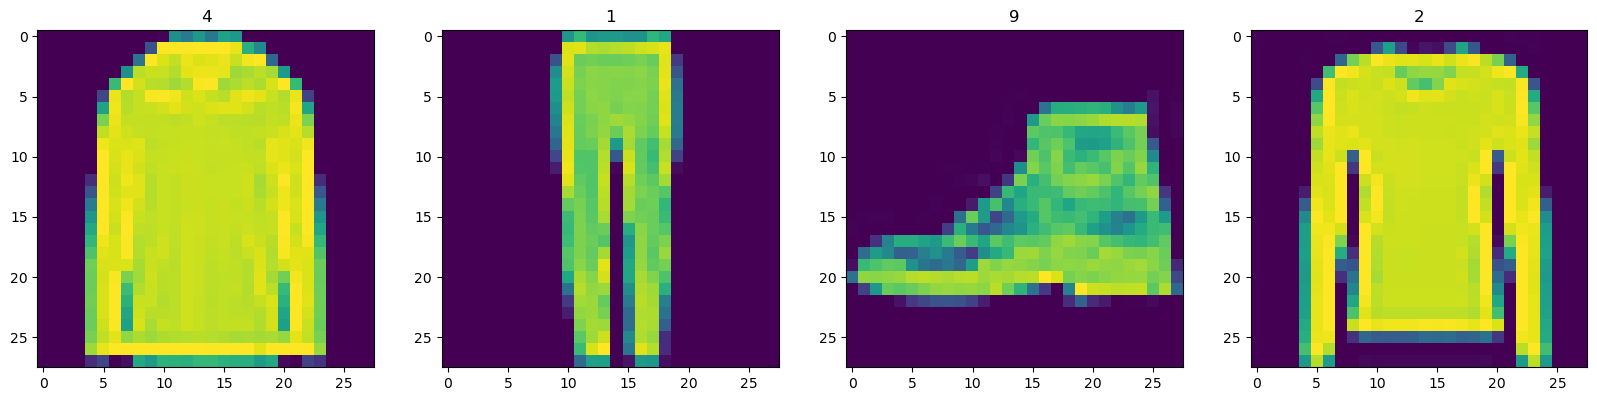

In [23]:
#setup the subplot formatting(20x20)
fig, ax=plt.subplots(ncols=4, figsize=(20,20)) # ax is subplot 1,2,3,4
#loop 4 times and get images
for idx in range(4):
    batch=datait.next() #next batch of values or the image
    ax[idx].imshow(np.squeeze(batch['image'])) #squeeze turn (28,28,1) to (28,28)
    #adding image as label of plot at the top
    ax[idx].title.set_text(batch['label'])

In [24]:
#scale and return images only
def scale_image(data):
    images=data['image']
    return image/255

While building data pipeline:
Map - Cache - Shuffle - Batch - Prefetch